#Algorithms for DNA Sequencing
![Cardiotoxicity](https://d3njjcbhbojbot.cloudfront.net/api/utilities/v1/imageproxy/https://d15cw65ipctsrr.cloudfront.net/0d/70fa70056211e5a90571fac85e36f5/genomics_algorithms.jpg?auto=format&dpr=1&w=290&h=165&fit=crop)


#Programming Homework 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%qtconsole
%matplotlib inline

In [2]:
def loadLambdaVirusDNA(filename):
    f = open(filename)
    dna=''
    for line in f:
        if line[0] != '>':
            dna += line.rstrip()
        else:
            header = line.split()
            name = header[0][1:]
    return name, dna
lambdavirusname, lambdavirusdna = loadLambdaVirusDNA('lambda_virus.fa')

In [3]:
len(lambdavirusdna)

48502

In [4]:
def reverseComplement(sequence):
    complement = {'A': 'T', 'T': 'A', 'C': 'G', 'G': 'C', 'N': 'N'}
    csequence=''
    for s in sequence:
        csequence = complement[s] + csequence
    return csequence

In [5]:
def naive_with_rc(p, t):
    appearance = []
    
    for i in range(len(t) - len(p) + 1):
        for j in range(len(p)):
            match = True
            if t[i + j] != p[j]:
                match = False
                break                
        if match == True:
            appearance.append(i)
                
    cappearance = []
    cp = reverseComplement(p)
    
    for i in range(len(t) - len(cp) + 1):
        for j in range(len(cp)):
            match = True
            if t[i + j] != cp[j]:
                match = False
                break                
        if match == True:
            cappearance.append(i)
    #return len(appearance) + len(cappearance)
    return appearance, cappearance        

In [6]:
p = 'CCC'
ten_as = 'AAAAAAAAAA'
t = ten_as + 'CCC' + ten_as + 'GGG' + ten_as
occurrences = naive_with_rc(p, t)
print(occurrences)

([10], [23])


#Question 1
How many times does AGGT or its reverse complement (ACCT) occur in the lambda virus genome? E.g. if AGGT occurs 10 times and ACCT occurs 12 times, you should report 22.
Answer: 

In [7]:
appearances = naive_with_rc('AGGT', lambdavirusdna)

In [8]:
len(appearances[0]) + len(appearances[1])

306

Answer: 306

#Question 2
How many times does TTAA or its reverse complement occur in the lambda virus genome? Hint: TTAA and its reverse complement are equal, so remember not to double count.

In [9]:
appearances = naive_with_rc('TTAA', lambdavirusdna)

In [10]:
len(appearances[1])

195

Answer: 195

#Question 3
What is the offset of the leftmost occurrence of ACTAAGT or its reverse complement in the Lambda virus genome? E.g. if the leftmost occurrence of ACTAAGT is at offset 40 (0-based) and the leftmost occurrence of its reverse complement ACTTAGT is at offset 29, then report 29.

In [11]:
appearances = naive_with_rc('ACTAAGT', lambdavirusdna)
appearances[0][0], appearances[1][0]

(27733, 26028)

Answer: 26028

#Question 4
What is the offset of the leftmost occurrence of AGTCGA or its reverse complement in the Lambda virus genome?

In [12]:
appearances = naive_with_rc('AGTCGA', lambdavirusdna)
appearances[0][0], appearances[1][0]

(18005, 450)

Answer: 450

#Question 5
As we will discuss, sometimes we would like to find approximate matches for P in T. That is, we want to find occurrences with one or more differences.

For Questions 5 and 6, make a new version of the naive function called naive_2mm that allows up to 2 mismatches per occurrence. Unlike for the previous questions, do not consider the reverse complement here. We're looking for approximate matches for P itself, not its reverse complement. ￼

For example, ACTTTA occurs twice in ACTTACTTGATAAAGT, once at offset 0 with 2 mismatches, and once at offset 4 with 1 mismatch. So naive_2mm('ACTTTA', 'ACTTACTTGATAAAGT') should return the list [0, 4].

Hint: See this notebook for a few examples you can use to test your naive_2mm function.

How many times does TTCAAGCC occur in the Lambda virus genome when allowing up to 2 mismatches?

In [13]:
def naive_2mm(p, t):
    appearance = []    
    
    for i in range(len(t) - len(p) + 1):
        mismatch = 0
        for j in range(len(p)):            
            if t[i + j] != p[j]:
                mismatch += 1
                if mismatch == 3:
                    break                
        if mismatch <= 2:
            appearance.append(i)
            
    return appearance

In [14]:
appearances = naive_2mm('TTCAAGCC', lambdavirusdna)
appearances[0]
len(appearances)

191

In [15]:
lambdavirusdna[45:(45+8)]

'TTTAAGGC'

Answer: 45

#Question 6
What is the offset of the leftmost occurrence of AGGAGGTT in the Lambda virus genome when allowing up to 2 mismatches?

In [16]:
appearances = naive_2mm('AGGAGGTT', lambdavirusdna)
appearances[0]

49

Answer: 49

#Question 7
Finally, download and parse the provided FASTQ file containing real DNA sequencing reads derived from a human:

https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR037900_1.first1000.fastq

Note that the file has many reads in it and you should examine all of them together when answering this question. The reads are taken from this study:

Ajay, S. S., Parker, S. C., Abaan, H. O., Fajardo, K. V. F., & Margulies, E. H. (2011). Accurate and comprehensive sequencing of personal genomes. Genome research, 21(9), 1498-1505.

This dataset has something wrong with it; one of the sequencing cycles is poor quality.

Report which sequencing cycle has the problem. Remember that a sequencing cycle corresponds to a particular offset in all the reads. For example, if the leftmost read position seems to have a problem consistently across reads, report 0. If the fourth position from the left has the problem, report 3. Do whatever analysis you think is needed to identify the bad cycle. It might help to review the "Analyzing reads by position" video.

In [17]:
def readFastQ(filename):
    f = open(filename)
    fastq = {}
    while 1:
        name = f.readline().rstrip()
        sequence = f.readline().rstrip()
        f.readline()
        quality = f.readline().rstrip()
        
        if len(name) == 0:
            break
            
        fastq[name] = [sequence, quality]
    return fastq

In [18]:
fastq = readFastQ('ERR037900_1.first1000.fastq')

In [19]:
names = list(fastq.keys())

In [20]:
qvalues = {}
for name in names:
    qvalues[name] = []
    quality = fastq[name][1]
    for q in quality:
        value = ord(q) - 33
        qvalues[name].append(value)

In [21]:
qsequence={}
for name in names:
    qsequence[name] = fastq[name][0]

In [22]:
sequences = list(qsequence.values())

In [23]:
gc = [0] * 100
total = [0] * 100
for seq in sequences:
    for i in range(len(seq)):
        if seq[i] == 'C' or seq[i] == 'G':
            gc[i] += 1            
        total[i] +=1
        
for i in range(len(gc)):
    if total[i] != 0:
        gc[i] = gc[i]/total[i]

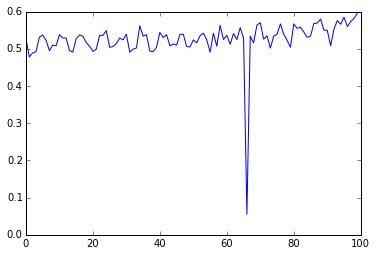

In [24]:
plt.plot(range(len(gc)), gc)
plt.show()

In [25]:
for i in range(len(gc)):
    if gc[i] < 0.1:
        print(i)

66
